In [58]:
#import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [61]:
testColumn = 'FUELCONSUMPTION_HWY'
data = pd.read_csv(r'.\Data\Fuel.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [62]:
columns = ["FUELCONSUMPTION_HWY", "FUELCONSUMPTION_CITY", "ENGINESIZE", "FUELCONSUMPTION_COMB_MPG", "CO2EMISSIONS", "CYLINDERS"]
data = data.reindex(columns=columns)
#Let's select some features to explore more:
#data = data[[testColumn, 'CO2EMISSIONS']]

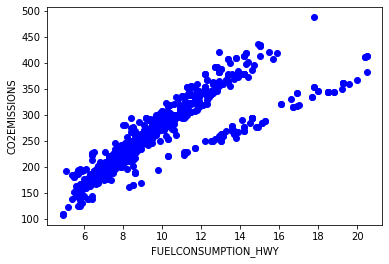

In [63]:
# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data[testColumn], data['CO2EMISSIONS'], color='blue')
plt.xlabel(testColumn)
plt.ylabel('CO2EMISSIONS')
plt.show()

In [64]:
# Generating training & testing data from our data:
# We are using 80% data for training
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.2))):]

In [68]:
# Modeling using sklearn package to model data:
regr = linear_model.LinearRegression()
train_x = np.array(train[["FUELCONSUMPTION_HWY", "ENGINESIZE", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_COMB_MPG", "CYLINDERS"]])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# Coefficients
print ('coefficients : ', regr.coef_) #Slope
print ('Intercept : ', regr.intercept_) #Intercept

#On graph this means
# Y = 38.795x + 127.17

coefficients :  [[ 4.48168775  7.86400985 -1.25515041 -4.08365312  8.4165174 ]]
Intercept :  [262.74874155]


Text(0, 0.5, 'Emission')

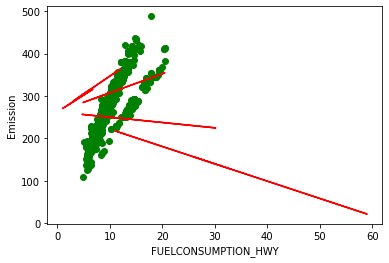

In [73]:
# Plot the best fit line
plt.scatter(train[testColumn], train['CO2EMISSIONS'], color='green')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel(testColumn)
plt.ylabel('Emission')

In [74]:
# Predicting Values:
# Function for predicting future values:
def get_regression_predictions(input_features, intercept, slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [75]:
#Prediciting emission for future car:
value_to_predict = 20
estimated_emission = get_regression_predictions(value_to_predict, regr.intercept_[0], regr.coef_[0][0])
print('Esimated Emission: ', estimated_emission)

Esimated Emission:  352.3824965835765


In [76]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[["FUELCONSUMPTION_HWY", "ENGINESIZE", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_COMB_MPG", "CYLINDERS"]])
test_y = np.array(test[['CO2EMISSIONS']])
predicted_test_y = regr.predict(test_x)

In [77]:
print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(predicted_test_y - test_y)))
print("Mean squared error (MSE): %.2f" % np.mean((predicted_test_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(predicted_test_y, test_y))


#MAE - Shows average error is 23.98
#MSE - Shows mean squared error is 974.29

#ENGINESIZE - 23.98 - 974.29 - 0.68
#FUELCONSUMPTION_COMB - 21.75 - 871.78 - 0.73
#FUELCONSUMPTION_COMB_MPG - 17.65 - 757.39 - 0.80

# ---- Multiple Regression ----
#"FUELCONSUMPTION_HWY", "ENGINESIZE" - 18.27, 625.96, 0.82
# +FUELCONSUMPTION_CITY - 17.86, 598.62, 0.83
# +FUELCONSUMPTION_COMB_MPG - 14.51, 484.62, 0.87
# +CYLINDERS - 14.26, 470.76, 0.87

Mean absolute error (MAE): 14.26
Mean squared error (MSE): 470.76
R2-score: 0.87
